<center><h1> <strong> ICFES: Predictive model based on <br/> Socioeconomic status, cultural capital and inequality </strong>
 </h1>

<center><h2>Data Minning <br/> Third Report </h2>
<center><h3>Universidad Nacional de Colombia</h3>
<center><h4>December 2022</h4>

-------
-------

by: 

Jerson Mauricio Caviendes

Javier Eduardo Duarte Aunta

-------
-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn import svm, metrics
import numpy as np

# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/Shared drives/Minería de Datos/Datos/ICFES_t_2022-11-06.csv', sep = ';', low_memory=False )

Predictors= ['ESTU_GENERO', 'ESTU_TIENEETNIA', 'ESTU_REGI_RESIDE_B0' ,'ESTU_REGI_RESIDE_B1' ,'ESTU_REGI_RESIDE_B2', 'ESTU_REGI_RESIDE_B3' ,'ESTU_REGI_RESIDE_B4', 'ESTU_REGI_RESIDE_B5','FAMI_ESTRATOVIVIENDA','FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR' ,'FAMI_EDUCACIONPADRE', 'FAMI_TRABAJOLABORPADRE_B10', 'FAMI_TRABAJOLABORPADRE_B9', 'FAMI_TRABAJOLABORPADRE_B8', 'FAMI_TRABAJOLABORPADRE_B7',	'FAMI_TRABAJOLABORPADRE_B6',	'FAMI_TRABAJOLABORPADRE_B5', 'FAMI_TRABAJOLABORPADRE_B4',	'FAMI_TRABAJOLABORPADRE_B3',	'FAMI_TRABAJOLABORPADRE_B2',	'FAMI_TRABAJOLABORPADRE_B1',	'FAMI_TRABAJOLABORPADRE_B0', 'FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORMADRE_B12', 'FAMI_TRABAJOLABORMADRE_B11', 'FAMI_TRABAJOLABORMADRE_B10', 'FAMI_TRABAJOLABORMADRE_B9',	'FAMI_TRABAJOLABORMADRE_B8', 'FAMI_TRABAJOLABORMADRE_B7', 'FAMI_TRABAJOLABORMADRE_B6', 'FAMI_TRABAJOLABORMADRE_B5',	'FAMI_TRABAJOLABORMADRE_B4', 'FAMI_TRABAJOLABORMADRE_B3',	'FAMI_TRABAJOLABORMADRE_B2',	'FAMI_TRABAJOLABORMADRE_B1',	'FAMI_TRABAJOLABORMADRE_B0','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV' ,'FAMI_TIENECOMPUTADOR','FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS','FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE','FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET','ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION_B5', 'ESTU_TIPOREMUNERACION_B4',	'ESTU_TIPOREMUNERACION_B3' ,'ESTU_TIPOREMUNERACION_B2' ,'COLE_GENERO_B2', 'COLE_GENERO_B1', 'COLE_GENERO_B0', 'COLE_NATURALEZA', 'COLE_CALENDARIO_B2', 'COLE_CALENDARIO_B1', 'COLE_CALENDARIO_B0', 'COLE_BILINGUE', 'COLE_CARACTER_B4', 'COLE_CARACTER_B3',	'COLE_CARACTER_B2', 'COLE_CARACTER_B1',	'COLE_CARACTER_B0', 'COLE_AREA_UBICACION', 'COLE_JORNADA_B5', 'COLE_JORNADA_B4', 'COLE_JORNADA_B3', 'COLE_JORNADA_B2', 'COLE_JORNADA_B1', 'COLE_JORNADA_B0',]




#Clasificación Binaria

In [ ]:
Target = 'TWO_GLOBAL_SCORE'
n_classes = 2

df2 = df1[df1.TWO_GLOBAL_SCORE == 0]
df3 = df1[df1.TWO_GLOBAL_SCORE == 1]

x1 = df2.shape
x2 = df3.shape

print(x1,x2)

df2 = df2.sample(n=153123, replace= False)


#Revolver los dataframe
df2 = df2.sample(frac=1)
df3 = df3.sample(frac=1)


print(df2.shape,df3.shape)


X0 = df2[Predictors].values
Y0 = df2[Target].values

X1 = df3[Predictors].values
Y1 = df3[Target].values



print(X0.shape, Y0.shape)
print(X1.shape, Y1.shape)

(153123, 111) (155424, 111)
(153123, 111) (155424, 111)
(153123, 77) (153123,)
(155424, 77) (155424,)


In [ ]:
x0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=0.3,random_state=109) # 70% training and 30% test
x1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=70) # 70% training and 30% test


x_train = np.concatenate((x0_train, x1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))


print(x_train.shape)
print(y_train.shape)


(215982, 77)
(215982,)


#Clasificación con tres clases

In [ ]:
Target = 'THREE_GLOBAL_SCORE'
n_classes = 3

df2 = df1[df1.THREE_GLOBAL_SCORE == 1]
df3 = df1[df1.THREE_GLOBAL_SCORE == 2]
df4 = df1[df1.THREE_GLOBAL_SCORE == 3]

x1 = df2.shape
x2 = df3.shape
x3 = df4.shape

print(x1,x2,x3) 

df2 = df2.sample(n=99155, replace = False)
df4 = df4.sample(n=99155, replace = False)

#Revolver los dataframe
df2 = df2.sample(frac=1)
df3 = df3.sample(frac=1)
df4 = df4.sample(frac=1)

print(df2.shape,df3.shape,df4.shape) 

X1 = df2[Predictors].values
Y1 = df2[Target].values

X2 = df3[Predictors].values
Y2 = df3[Target].values

X3 = df4[Predictors].values
Y3 = df4[Target].values


print(X1.shape, Y1.shape)
print(X2.shape, Y2.shape)
print(X3.shape, Y3.shape)

(109979, 111) (99155, 111) (99413, 111)
(99155, 111) (99155, 111) (99155, 111)
(99155, 77) (99155,)
(99155, 77) (99155,)
(99155, 77) (99155,)


In [ ]:
x1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=109) # 70% training and 30% test
x2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3,random_state=70) # 70% training and 30% test
x3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3,random_state=200) # 70% training and 30% test

x_train =  np.concatenate((x1_train, x2_train, x3_train))
X_test =  np.concatenate((X1_test, X2_test, X3_test))
y_train =  np.concatenate((y1_train, y2_train, y3_train))
y_test =  np.concatenate((y1_test, y2_test, y3_test))

print(x_train.shape)
print(y_train.shape)

(208224, 77)
(208224,)


#Random Forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
parameter_space = {
    'n_estimators': [750, 600, 100],
    'max_depth': [15, 10, 10],
    'min_samples_split':[5, 3, 2],
    'min_samples_leaf': [3,2,1],
}
rf = RandomForestClassifier(random_state = 42)

clf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=10)

#training
clf.fit(x_train, y_train)


In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

from sklearn.metrics import  ConfusionMatrixDisplay, RocCurveDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,normalize='all', cmap='Blues')  
RocCurveDisplay.from_estimator(clf, X_test, y_test, response_method='predict_proba')


'''from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test = label_binarize(y_test, classes=[1,2,3])
y_pred = label_binarize(y_pred, classes=[1,2,3])
n_classes = 3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()'''


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # 

parameter_space = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth':[15, 10, 5],
    'min_samples_leaf': [3,2,1],
}

df = DecisionTreeClassifier()

clf = GridSearchCV(df, parameter_space, n_jobs=-1, cv=10)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32383 13137]
 [18122 27398]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67     45520
           1       0.68      0.60      0.64     45520

    accuracy                           0.66     91040
   macro avg       0.66      0.66      0.66     91040
weighted avg       0.66      0.66      0.66     91040



[[32383 13137]
 [18122 27398]]


'from sklearn.preprocessing import label_binarize\nfrom sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\ny_test = label_binarize(y_test, classes=[0,1])\ny_pred = label_binarize(y_pred, classes=[0,1])\nn_classes = 2\n\n# Compute ROC curve and ROC area for each class\nfpr = dict()\ntpr = dict()\nroc_auc = dict()\nfor i in range(n_classes):\n    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])\n    roc_auc[i] = auc(fpr[i], tpr[i])\n\nfpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())\nroc_auc["micro"] = auc(fpr["micro"], tpr["micro"])\n\nplt.figure()\nlw = 2\nplt.plot(\n    fpr[2],\n    tpr[2],\n    color="darkorange",\n    lw=lw,\n    label="ROC curve (area = %0.2f)" % roc_auc[2],\n)\nplt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("Receiver operating characteristic")\nplt.legend(loc="lower righ

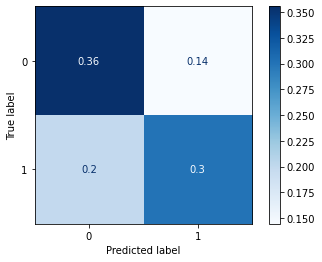

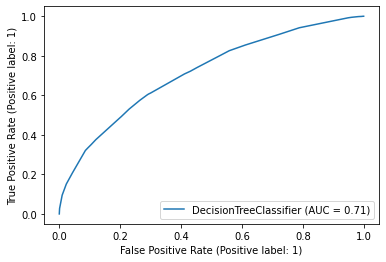

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)


from sklearn.metrics import  ConfusionMatrixDisplay, RocCurveDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,normalize='all', cmap='Blues') 
RocCurveDisplay.from_estimator(clf, X_test, y_test, response_method='predict_proba')



'''from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test = label_binarize(y_test, classes=[0,1])
y_pred = label_binarize(y_pred, classes=[0,1])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()'''

#K-Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



parameter_space = {
    'n_neighbors': [5, 3, 2, 10],
    'algorithm': ["auto"],
    'leaf_size':[15, 10],
}

knn = KNeighborsClassifier(metric='euclidean')

clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=10)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

from sklearn.metrics import  ConfusionMatrixDisplay, RocCurveDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,normalize='all', cmap='Blues')  
RocCurveDisplay.from_estimator(clf, X_test, y_test, response_method='predict_proba')



'''from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test = label_binarize(y_test, classes=[0,1])
y_pred = label_binarize(y_pred, classes=[0,1])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()'''


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, CategoricalNB, MultinomialNB


parameter_space = {}

gnb = CategoricalNB()

clf = GridSearchCV(gnb, parameter_space, n_jobs=-1, cv=10)

# Train Decision Tree Classifer
clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18040  6061  5646]
 [11363  8187 10197]
 [ 5572  6390 17785]]
              precision    recall  f1-score   support

           1       0.52      0.61      0.56     29747
           2       0.40      0.28      0.32     29747
           3       0.53      0.60      0.56     29747

    accuracy                           0.49     89241
   macro avg       0.48      0.49      0.48     89241
weighted avg       0.48      0.49      0.48     89241



[[18040  6061  5646]
 [11363  8187 10197]
 [ 5572  6390 17785]]


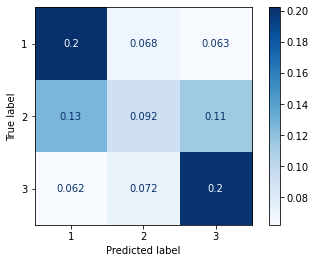

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

from sklearn.metrics import  ConfusionMatrixDisplay, RocCurveDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,normalize='all', cmap='Blues')  
#RocCurveDisplay.from_estimator(clf, X_test, y_test, response_method='predict_proba')


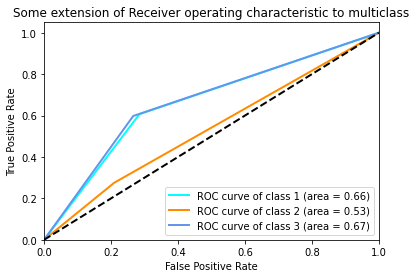

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt


classes = [1,2,3]
n_classes = 3
y_test = label_binarize(y_test, classes=classes)
y_score = label_binarize(y_pred, classes=classes)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue","red","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()